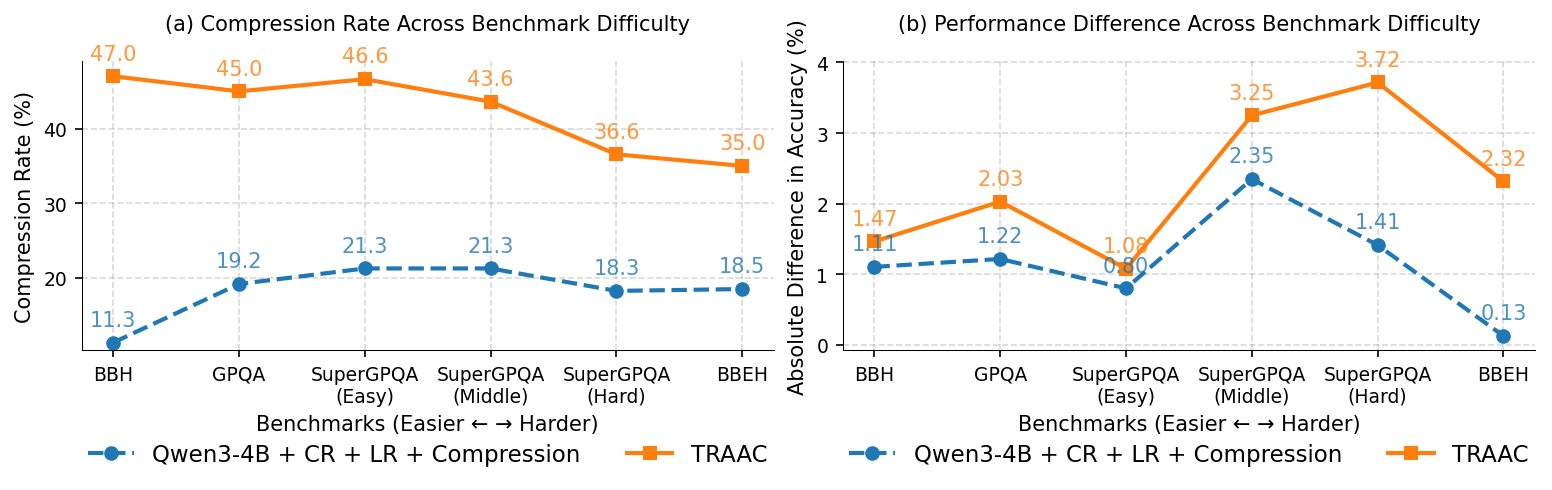

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for both plots
compression_data = {
    "BBH": [11.35, 47.04],
    "GPQA": [19.2, 45.01],
    "SuperGPQA (Easy)": [21.28, 46.64],
    "SuperGPQA (Middle)": [21.28, 43.63],
    "SuperGPQA (Hard)": [18.27, 36.57],
    "BBEH": [18.52, 35.02],
}

similarity_data = {
    "BBH": [1.1063, 1.4657],
    "GPQA": [1.2182, 2.0304],
    "SuperGPQA (Easy)": [0.802, 1.0802],
    "SuperGPQA (Middle)": [2.3490, 3.2511],
    "SuperGPQA (Hard)": [1.4148, 3.7174],
    "BBEH": [0.129, 2.3152],
}

models = [
    "Qwen3-4B + CR + LR + Compression",
    "TRAAC"
]

similarity_models = [
    "Qwen3-4B + CR + LR + Compression",
    "TRAAC"
]

# Difficulty scores (higher = easier)
difficulty = {
    "BBH": 82.4302,
    "GPQA": 45.18,
    "SuperGPQA (Easy)": 38.518,
    "SuperGPQA (Middle)": 29.56,
    "SuperGPQA (Hard)": 24.7035,
    "BBEH": 18.28
}

# Convert to DataFrames
df_compression = pd.DataFrame(compression_data, index=models)
df_similarity = pd.DataFrame(similarity_data, index=similarity_models)

# Benchmarks ordered by descending difficulty (easy → hard)
ordered_benchmarks = sorted(difficulty.keys(), key=lambda x: difficulty[x], reverse=True)

# Evenly spaced positions for x-axis
x_positions = list(range(len(ordered_benchmarks)))

# Create multi-line labels for x-ticks
benchmark_labels = []
for benchmark in ordered_benchmarks:
    if "SuperGPQA" in benchmark:
        parts = benchmark.split(" ")
        benchmark_labels.append(f"{parts[0]}\n{parts[1]}")
    else:
        benchmark_labels.append(benchmark)

# Create figure with two subplots side by side, sharing x-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 2.5), sharex=True, dpi=150)

# Define clean colors for research paper
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange
line_styles = ['--', '-']  # First model dotted, TRAAC solid
markers = ['o', 's']

# Plot 1: Compression Rate
for i, model in enumerate(df_compression.index):
    y_vals = df_compression.loc[model, ordered_benchmarks]
    
    ax1.plot(
        x_positions, y_vals,
        marker=markers[i],
        color=colors[i],
        linestyle=line_styles[i],
        linewidth=2,
        markersize=6,
        label=model,
        markerfacecolor=colors[i],
        markeredgecolor=colors[i],
        alpha=1.0
    )
    
    # Add value annotations
    for j, (x, y, benchmark) in enumerate(zip(x_positions, y_vals, ordered_benchmarks)):
        ax1.annotate(f'{y:.1f}', 
                   (x, y), 
                   textcoords="offset points", 
                   xytext=(0, 8), 
                   ha='center',
                   fontsize=10,
                   color=colors[i],
                   alpha=0.8)

# Customize plot 1
ax1.set_title("(a) Compression Rate Across Benchmark Difficulty", 
             fontsize=10, fontweight='normal', pad=15)
ax1.set_ylabel("Compression Rate (%)", fontsize=10, fontweight='normal')
ax1.grid(True, linestyle="--", alpha=0.3, color='gray')
ax1.set_axisbelow(True)
ax1.set_facecolor('white')
ax1.tick_params(axis='both', which='major', labelsize=9)

# Set y-axis limits for compression plot
y_min_comp = df_compression.values.min() - 1
y_max_comp = df_compression.values.max() + 2
ax1.set_ylim(y_min_comp, y_max_comp)

# Plot 2: Performance Difference
for i, model in enumerate(df_similarity.index):
    y_vals = df_similarity.loc[model, ordered_benchmarks]
    
    ax2.plot(
        x_positions, y_vals,
        marker=markers[i],
        color=colors[i],
        linestyle=line_styles[i],
        linewidth=2,
        markersize=6,
        label=model,
        markerfacecolor=colors[i],
        markeredgecolor=colors[i],
        alpha=1.0
    )
    
    # Add value annotations
    for j, (x, y, benchmark) in enumerate(zip(x_positions, y_vals, ordered_benchmarks)):
        ax2.annotate(f'{y:.2f}', 
                   (x, y), 
                   textcoords="offset points", 
                   xytext=(0, 8), 
                   ha='center',
                   fontsize=10,
                   color=colors[i],
                   alpha=0.8)

# Customize plot 2
ax2.set_title("(b) Performance Difference Across Benchmark Difficulty", 
             fontsize=10, fontweight='normal', pad=15)
ax2.set_ylabel("Absolute Difference in Accuracy (%)", fontsize=10, fontweight='normal')
ax2.grid(True, linestyle="--", alpha=0.3, color='gray')
ax2.set_axisbelow(True)
ax2.set_facecolor('white')
ax2.tick_params(axis='both', which='major', labelsize=9)

# Set y-axis limits for similarity plot
y_min_sim = df_similarity.values.min() - 0.2
y_max_sim = df_similarity.values.max() + 0.3
ax2.set_ylim(y_min_sim, y_max_sim)

# Apply common x-axis ticks and labels
for ax in [ax1, ax2]:
    ax.set_xticks(x_positions)
    ax.set_xticklabels(benchmark_labels, fontsize=9)
    ax.set_xlabel("Benchmarks (Easier ← → Harder)", fontsize=10, fontweight='normal')

# Add legends below each plot (horizontal, no frame)
legend1 = ax1.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),  # position below subplot
    ncol=2,                       # make it horizontal
    frameon=False,
    fontsize=11
)

legend2 = ax2.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=2,
    frameon=False,
    fontsize=11
)

for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_edgecolor('black')
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_edgecolor('black')
    ax.spines['bottom'].set_linewidth(0.5)

# Adjust layout and save
# plt.tight_layout()
plt.subplots_adjust(wspace=0.10)  # Reduce space between subplots
plt.savefig("fine_grained_analysis.pdf", bbox_inches='tight')
# plt.show()

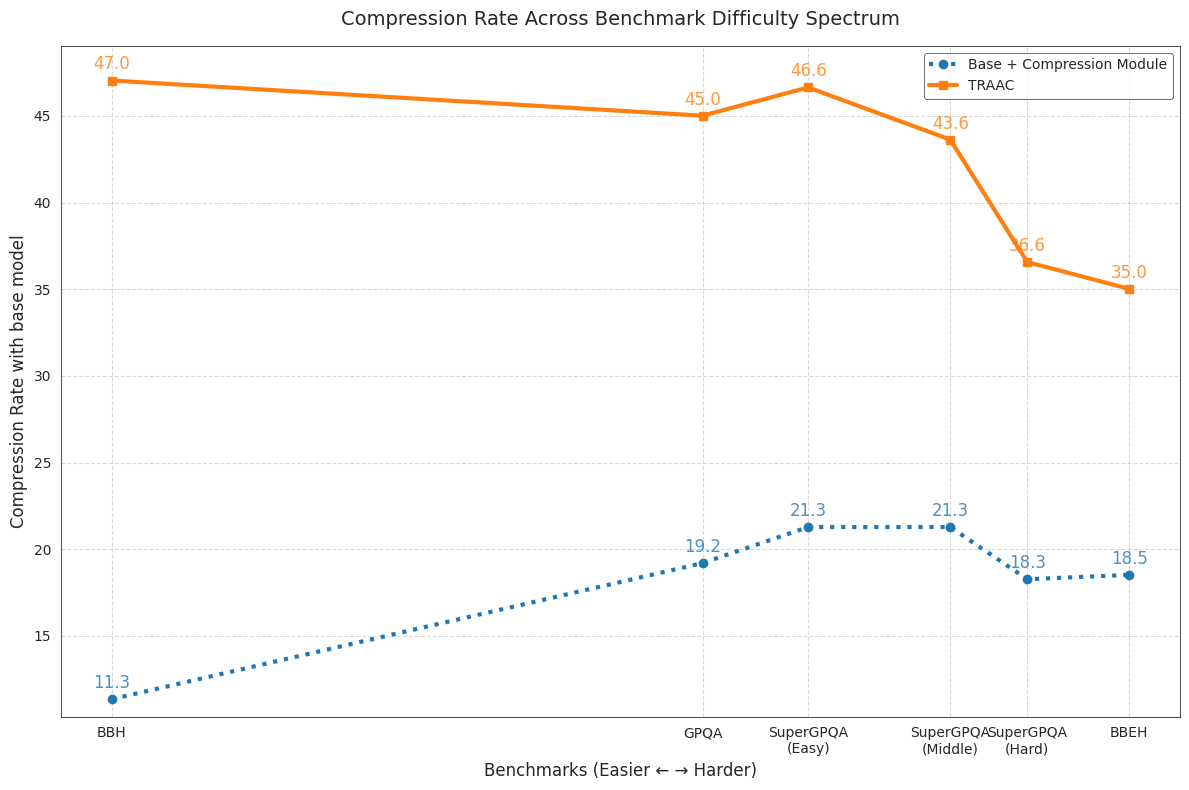

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Set clean style for research paper
plt.style.use('default')
sns.set_style("whitegrid", {'axes.grid': True, 'grid.alpha': 0.3})

# Benchmark performance data
data = {
    "BBH": [11.35, 47.04],
    "GPQA": [19.2, 45.01],
    "SuperGPQA (Easy)": [21.28, 46.64],
    "SuperGPQA (Middle)": [21.28, 43.63],
    "SuperGPQA (Hard)": [18.27, 36.57],
    "BBEH": [18.52, 35.02],
}

models = [
    "Base + Compression Module",
    "TRAAC"
]

# Difficulty scores (higher = easier)
difficulty = {
    "BBH": 82.4302,
    "GPQA": 45.18,
    "SuperGPQA (Easy)": 38.518,
    "SuperGPQA (Middle)": 29.56,
    "SuperGPQA (Hard)": 24.7035,
    "BBEH": 18.28
}

# Convert to DataFrame
df = pd.DataFrame(data, index=models)

# Benchmarks ordered by descending difficulty (easy → hard)
ordered_benchmarks = sorted(difficulty.keys(), key=lambda x: difficulty[x], reverse=True)

# Create figure with clean white background
fig, ax = plt.subplots(figsize=(12, 8))

# Define clean colors for research paper - TRAAC solid, other dotted
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange
line_styles = [':', '-']  # Qwen dotted, TRAAC solid
markers = ['o', 's']

# Plot each model with enhanced styling
for i, model in enumerate(df.index):
    x_vals = [difficulty[b] for b in ordered_benchmarks]
    y_vals = df.loc[model, ordered_benchmarks]
    
    ax.plot(
        x_vals, y_vals,
        marker=markers[i],
        color=colors[i],
        linestyle=line_styles[i],
        linewidth=3,
        markersize=6,
        label=model,
        markerfacecolor=colors[i],
        markeredgecolor=colors[i],
        alpha=1.0
    )
    
    # Add value annotations on points
    for x, y, benchmark in zip(x_vals, y_vals, ordered_benchmarks):
        ax.annotate(f'{y:.1f}', 
                   (x, y), 
                   textcoords="offset points", 
                   xytext=(0,8), 
                   ha='center',
                   fontsize=12,
                   color=colors[i],
                   alpha=0.8)

# Customize the plot appearance
ax.set_title("Compression Rate Across Benchmark Difficulty Spectrum", 
             fontsize=14, fontweight='normal', pad=15)

ax.set_xlabel("Benchmarks (Easier ← → Harder)", 
              fontsize=12, fontweight='normal')

ax.set_ylabel("Compression Rate with base model", 
              fontsize=12, fontweight='normal')

# Clean grid
ax.grid(True, linestyle="--", alpha=0.3, color='gray')
ax.set_axisbelow(True)

# Clean legend for research paper
legend = ax.legend(loc='upper right', 
                  frameon=True, 
                  fontsize=10)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(0.5)

# Create multi-line labels for x-ticks
benchmark_labels = []
for benchmark in ordered_benchmarks:
    if "SuperGPQA" in benchmark:
        parts = benchmark.split(" ")
        benchmark_labels.append(f"{parts[0]}\n{parts[1]}")
    else:
        benchmark_labels.append(benchmark)

# Set ticks with multi-line labels
tick_positions = [difficulty[b] for b in ordered_benchmarks]
ax.set_xticks(tick_positions)
ax.set_xticklabels(benchmark_labels, fontsize=10)

# Flip axis so easiest (highest difficulty score) is left → hardest right
ax.invert_xaxis()

# Clean white background
ax.set_facecolor('white')

# Clean tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)

# Clean borders
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)

# Squeeze y-axis to make performance decrease more prominent
y_min = df.values.min() - 1
y_max = df.values.max() + 2
ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.savefig('compression_rate_across_benchmark_difficulty_spectrum.pdf')
plt.show()

# Optional: Save the plot in high quality
# plt.savefig('benchmark_performance.png', dpi=300, bbox_inches='tight', 
#             facecolor='white', edgecolor='none')

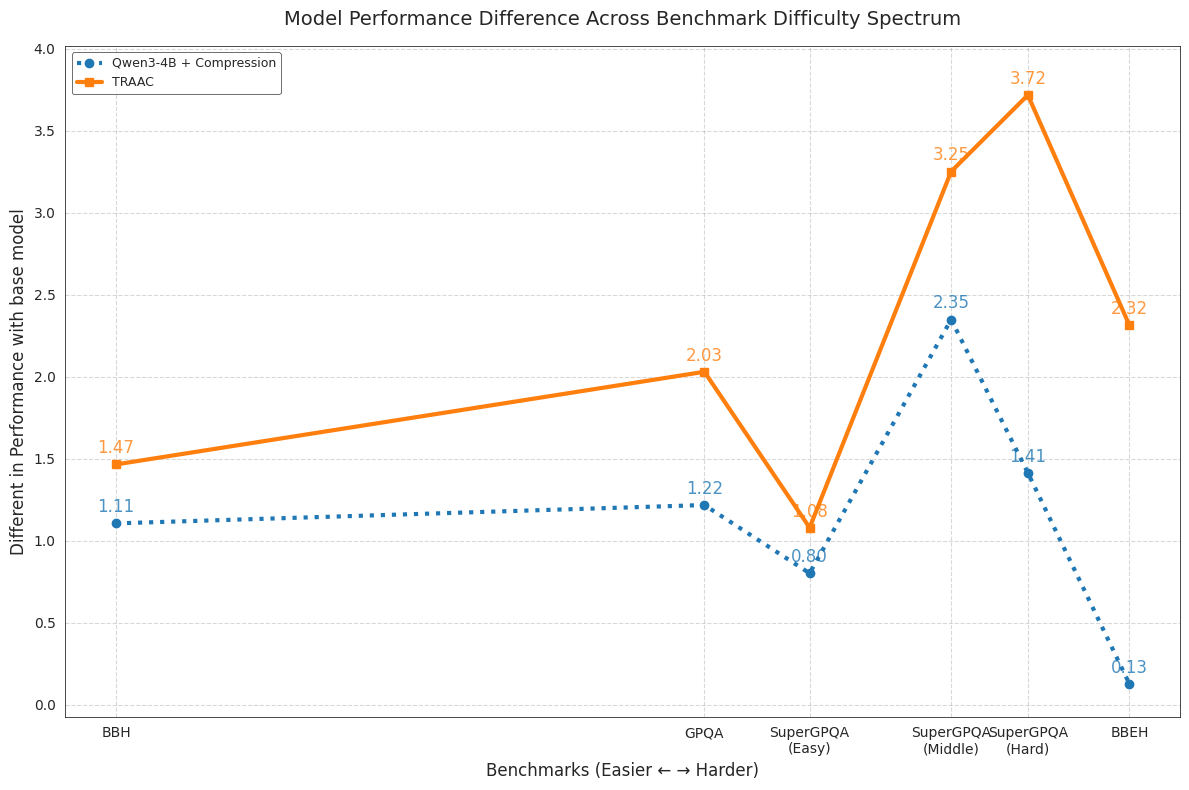

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Set clean style for research paper
plt.style.use('default')
sns.set_style("whitegrid", {'axes.grid': True, 'grid.alpha': 0.3})

# Similarity data
data = {
    "BBH": [ 1.1063, 1.4657],
    "GPQA": [ 1.2182, 2.0304],
    "SuperGPQA (Easy)": [ 0.802, 1.0802],
    "SuperGPQA (Middle)": [ 2.3490, 3.2511],
    "SuperGPQA (Hard)": [ 1.4148, 3.7174],
    "BBEH": [ 0.129, 2.3152],
}

models = [
    "Qwen3-4B + Compression",
    "TRAAC"
]

# Difficulty scores (higher = easier) - same as before
difficulty = {
    "BBH": 82.4302,
    "GPQA": 45.18,
    "SuperGPQA (Easy)": 38.518,
    "SuperGPQA (Middle)": 29.56,
    "SuperGPQA (Hard)": 24.7035,
    "BBEH": 18.28
}

# Convert to DataFrame
df = pd.DataFrame(data, index=models)

# Benchmarks ordered by descending difficulty (easy → hard)
ordered_benchmarks = sorted(difficulty.keys(), key=lambda x: difficulty[x], reverse=True)

# Create figure with clean white background
fig, ax = plt.subplots(figsize=(12, 8))

# Define clean colors for research paper - TRAAC solid, other dotted
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange
line_styles = [':', '-']  # Qwen dotted, TRAAC solid
markers = ['o', 's']

# Plot each model with clean styling
for i, model in enumerate(df.index):
    x_vals = [difficulty[b] for b in ordered_benchmarks]
    y_vals = df.loc[model, ordered_benchmarks]
    
    ax.plot(
        x_vals, y_vals,
        marker=markers[i],
        color=colors[i],
        linestyle=line_styles[i],
        linewidth=3,
        markersize=6,
        label=model,
        markerfacecolor=colors[i],
        markeredgecolor=colors[i],
        alpha=1.0
    )
    
    # Add value annotations on points
    for x, y, benchmark in zip(x_vals, y_vals, ordered_benchmarks):
        ax.annotate(f'{y:.2f}', 
                   (x, y), 
                   textcoords="offset points", 
                   xytext=(0,8), 
                   ha='center',
                   fontsize=12,
                   color=colors[i],
                   alpha=0.8)

# Customize the plot appearance
ax.set_title("Model Performance Difference Across Benchmark Difficulty Spectrum", 
             fontsize=14, fontweight='normal', pad=15)

ax.set_xlabel("Benchmarks (Easier ← → Harder)", 
              fontsize=12, fontweight='normal')

ax.set_ylabel("Different in Performance with base model", 
              fontsize=12, fontweight='normal')

# Clean grid
ax.grid(True, linestyle="--", alpha=0.3, color='gray')
ax.set_axisbelow(True)

# Clean legend for research paper
legend = ax.legend(loc='upper left', 
                  frameon=True, 
                  fontsize=9)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(0.5)

# Create multi-line labels for x-ticks
benchmark_labels = []
for benchmark in ordered_benchmarks:
    if "SuperGPQA" in benchmark:
        parts = benchmark.split(" ")
        benchmark_labels.append(f"{parts[0]}\n{parts[1]}")
    else:
        benchmark_labels.append(benchmark)

# Set ticks with multi-line labels
tick_positions = [difficulty[b] for b in ordered_benchmarks]
ax.set_xticks(tick_positions)
ax.set_xticklabels(benchmark_labels, fontsize=10)

# Flip axis so easiest (highest difficulty score) is left → hardest right
ax.invert_xaxis()

# Clean white background
ax.set_facecolor('white')

# Clean tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)

# Clean borders
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)

# Squeeze y-axis to make changes more prominent
y_min = df.values.min() - 0.2
y_max = df.values.max() + 0.3
ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.savefig('model_performance_difference_across_benchmark_difficulty_spectrum.pdf')
plt.show()

# Optional: Save the plot in high quality
# plt.savefig('similarity_performance.png', dpi=300, bbox_inches='tight', 
#             facecolor='white', edgecolor='none')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


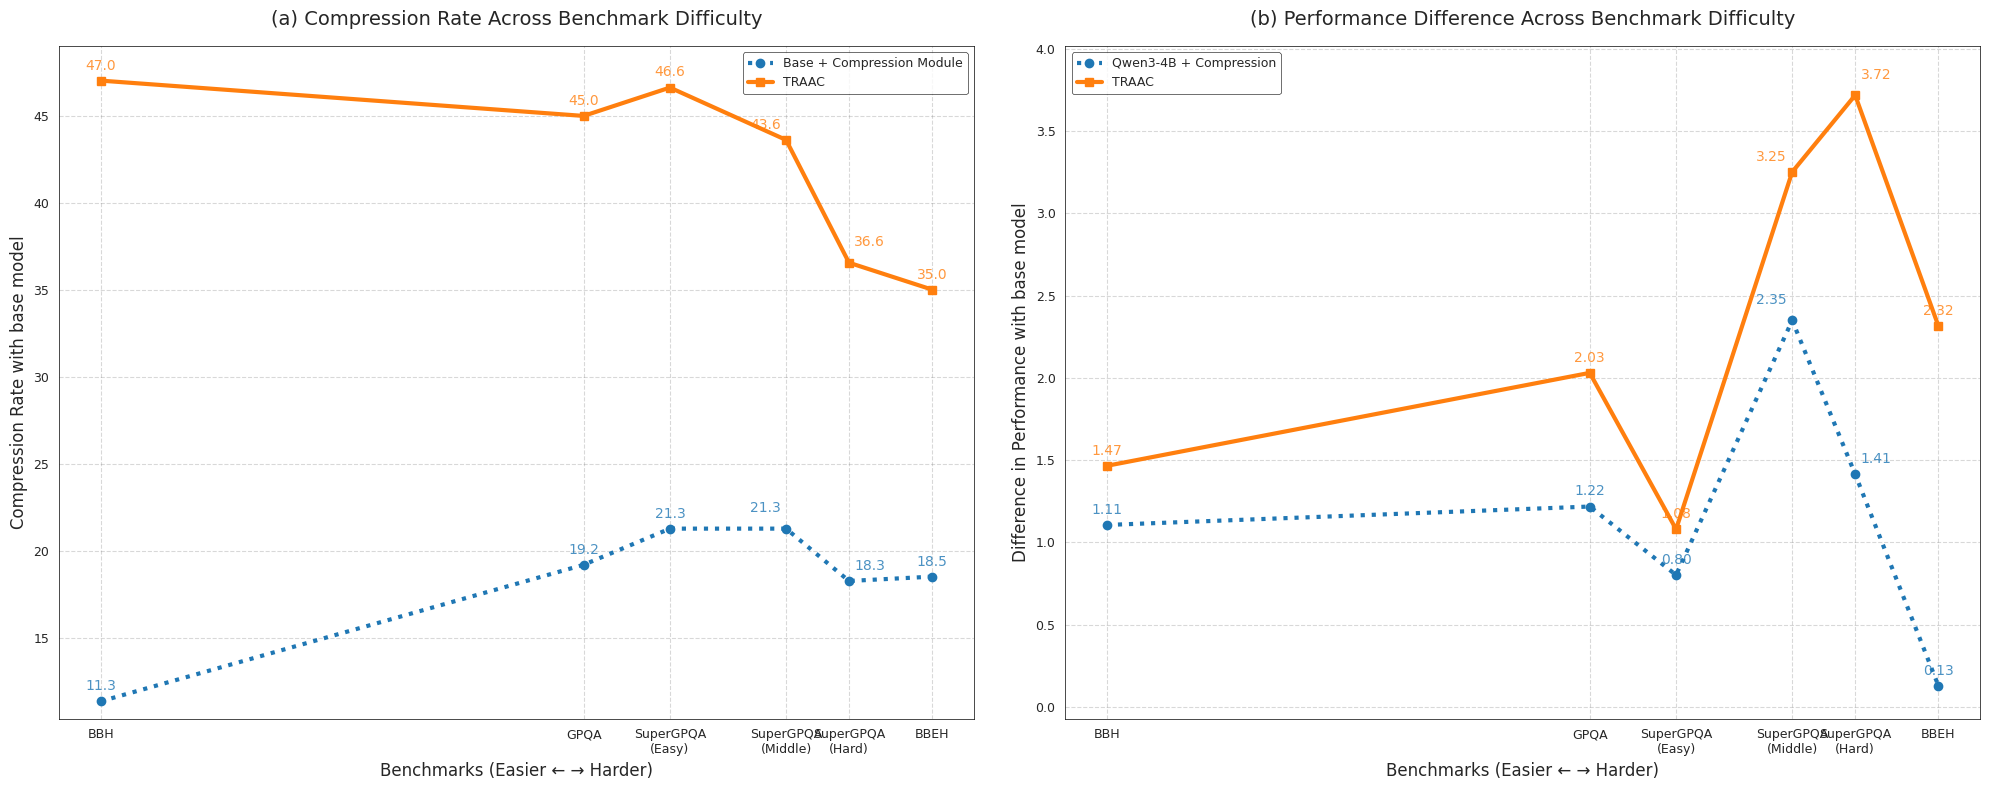

Figure saved as:
- combined_benchmark_analysis.pdf (recommended for LaTeX)
- combined_benchmark_analysis.png (for Word/PowerPoint)
- combined_benchmark_analysis.eps (alternative vector format)


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Set clean style for research paper
plt.style.use('default')
sns.set_style("whitegrid", {'axes.grid': True, 'grid.alpha': 0.3})

# Data for both plots
compression_data = {
    "BBH": [11.35, 47.04],
    "GPQA": [19.2, 45.01],
    "SuperGPQA (Easy)": [21.28, 46.64],
    "SuperGPQA (Middle)": [21.28, 43.63],
    "SuperGPQA (Hard)": [18.27, 36.57],
    "BBEH": [18.52, 35.02],
}

similarity_data = {
    "BBH": [1.1063, 1.4657],
    "GPQA": [1.2182, 2.0304],
    "SuperGPQA (Easy)": [0.802, 1.0802],
    "SuperGPQA (Middle)": [2.3490, 3.2511],
    "SuperGPQA (Hard)": [1.4148, 3.7174],
    "BBEH": [0.129, 2.3152],
}

models = [
    "Base + Compression Module",
    "TRAAC"
]

similarity_models = [
    "Qwen3-4B + Compression",
    "TRAAC"
]

# Difficulty scores (higher = easier)
difficulty = {
    "BBH": 82.4302,
    "GPQA": 45.18,
    "SuperGPQA (Easy)": 38.518,
    "SuperGPQA (Middle)": 29.56,
    "SuperGPQA (Hard)": 24.7035,
    "BBEH": 18.28
}

# Convert to DataFrames
df_compression = pd.DataFrame(compression_data, index=models)
df_similarity = pd.DataFrame(similarity_data, index=similarity_models)

# Benchmarks ordered by descending difficulty (easy → hard)
ordered_benchmarks = sorted(difficulty.keys(), key=lambda x: difficulty[x], reverse=True)

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Define clean colors for research paper
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange
line_styles = [':', '-']  # First model dotted, TRAAC solid
markers = ['o', 's']

# Create multi-line labels for x-ticks
benchmark_labels = []
for benchmark in ordered_benchmarks:
    if "SuperGPQA" in benchmark:
        parts = benchmark.split(" ")
        benchmark_labels.append(f"{parts[0]}\n{parts[1]}")
    else:
        benchmark_labels.append(benchmark)

tick_positions = [difficulty[b] for b in ordered_benchmarks]

# Plot 1: Compression Rate
for i, model in enumerate(df_compression.index):
    x_vals = [difficulty[b] for b in ordered_benchmarks]
    y_vals = df_compression.loc[model, ordered_benchmarks]
    
    ax1.plot(
        x_vals, y_vals,
        marker=markers[i],
        color=colors[i],
        linestyle=line_styles[i],
        linewidth=3,
        markersize=6,
        label=model,
        markerfacecolor=colors[i],
        markeredgecolor=colors[i],
        alpha=1.0
    )
    
    # Add value annotations on points with smart positioning to avoid overlap
    for j, (x, y, benchmark) in enumerate(zip(x_vals, y_vals, ordered_benchmarks)):
        # Smart positioning for SuperGPQA benchmarks to prevent overlap
        if benchmark == "SuperGPQA (Middle)":
            if i == 0:  # First model
                offset = (-15, 12)  # Left and up
            else:  # Second model
                offset = (-15, 8)   # Left and up
        elif benchmark == "SuperGPQA (Hard)":
            if i == 0:  # First model
                offset = (15, 8)   # Right and up
            else:  # Second model
                offset = (15, 12)   # Right and up
        else:
            offset = (0, 8)  # Standard position
            
        ax1.annotate(f'{y:.1f}', 
                   (x, y), 
                   textcoords="offset points", 
                   xytext=offset, 
                   ha='center',
                   fontsize=10,
                   color=colors[i],
                   alpha=0.8)

# Customize plot 1
ax1.set_title("(a) Compression Rate Across Benchmark Difficulty", 
             fontsize=14, fontweight='normal', pad=15)
ax1.set_xlabel("Benchmarks (Easier ← → Harder)", 
              fontsize=12, fontweight='normal')
ax1.set_ylabel("Compression Rate with base model", 
              fontsize=12, fontweight='normal')
ax1.grid(True, linestyle="--", alpha=0.3, color='gray')
ax1.set_axisbelow(True)
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(benchmark_labels, fontsize=9)
ax1.invert_xaxis()
ax1.set_facecolor('white')
ax1.tick_params(axis='both', which='major', labelsize=9)

# Set y-axis limits for compression plot
y_min_comp = df_compression.values.min() - 1
y_max_comp = df_compression.values.max() + 2
ax1.set_ylim(y_min_comp, y_max_comp)

# Plot 2: Performance Difference
for i, model in enumerate(df_similarity.index):
    x_vals = [difficulty[b] for b in ordered_benchmarks]
    y_vals = df_similarity.loc[model, ordered_benchmarks]
    
    ax2.plot(
        x_vals, y_vals,
        marker=markers[i],
        color=colors[i],
        linestyle=line_styles[i],
        linewidth=3,
        markersize=6,
        label=model,
        markerfacecolor=colors[i],
        markeredgecolor=colors[i],
        alpha=1.0
    )
    
    # Add value annotations on points with smart positioning to avoid overlap
    for j, (x, y, benchmark) in enumerate(zip(x_vals, y_vals, ordered_benchmarks)):
        # Smart positioning for SuperGPQA benchmarks to prevent overlap
        if benchmark == "SuperGPQA (Middle)":
            if i == 0:  # First model
                offset = (-15, 12)  # Left and up
            else:  # Second model
                offset = (-15, 8)   # Left and up
        elif benchmark == "SuperGPQA (Hard)":
            if i == 0:  # First model
                offset = (15, 8)   # Right and up
            else:  # Second model
                offset = (15, 12)   # Right and up
        else:
            offset = (0, 8)  # Standard position
            
        ax2.annotate(f'{y:.2f}', 
                   (x, y), 
                   textcoords="offset points", 
                   xytext=offset, 
                   ha='center',
                   fontsize=10,
                   color=colors[i],
                   alpha=0.8)

# Customize plot 2
ax2.set_title("(b) Performance Difference Across Benchmark Difficulty", 
             fontsize=14, fontweight='normal', pad=15)
ax2.set_xlabel("Benchmarks (Easier ← → Harder)", 
              fontsize=12, fontweight='normal')
ax2.set_ylabel("Difference in Performance with base model", 
              fontsize=12, fontweight='normal')
ax2.grid(True, linestyle="--", alpha=0.3, color='gray')
ax2.set_axisbelow(True)
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(benchmark_labels, fontsize=9)
ax2.invert_xaxis()
ax2.set_facecolor('white')
ax2.tick_params(axis='both', which='major', labelsize=9)

# Set y-axis limits for similarity plot
y_min_sim = df_similarity.values.min() - 0.2
y_max_sim = df_similarity.values.max() + 0.3
ax2.set_ylim(y_min_sim, y_max_sim)

# Add legends to both plots
legend1 = ax1.legend(loc='upper right', frameon=True, fontsize=9)
legend1.get_frame().set_facecolor('white')
legend1.get_frame().set_edgecolor('black')
legend1.get_frame().set_linewidth(0.5)

legend2 = ax2.legend(loc='upper left', frameon=True, fontsize=9)
legend2.get_frame().set_facecolor('white')
legend2.get_frame().set_edgecolor('black')
legend2.get_frame().set_linewidth(0.5)

# Clean borders for both plots
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.5)

# Adjust layout and save
plt.tight_layout()
plt.subplots_adjust(wspace=0.10)  # Reduce space between subplots

# Save in multiple formats for research paper
plt.savefig('combined_benchmark_analysis.pdf')
plt.savefig('combined_benchmark_analysis.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('combined_benchmark_analysis.eps', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.show()

print("Figure saved as:")
print("- combined_benchmark_analysis.pdf (recommended for LaTeX)")
print("- combined_benchmark_analysis.png (for Word/PowerPoint)")
print("- combined_benchmark_analysis.eps (alternative vector format)")